In [1]:
"""
Test using the Alaska Satellite Facility (ASF) for downloading Sentinel 1 data
""";

In [2]:
# import asf_search as asf
import geopandas as gpd
from shapely.geometry import box
from datetime import date
import sqlite3
import asf_search as asf

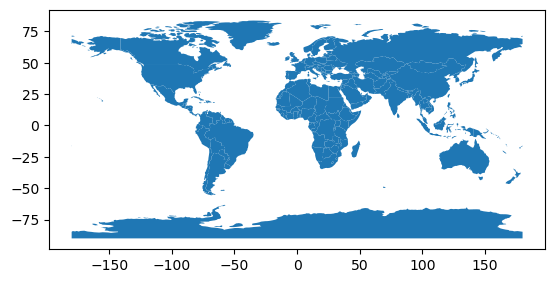

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot();

In [ ]:
db = sqlite3.connect("D:\\Sam-Johnston\\Deforestation_Monitoring\\S1_burstid_20220530\\IW\\sqlite\\burst_map_IW_000001_375887.sqlite3")


In [ ]:
cursor = db.cursor()

In [ ]:
res = cursor.execute("SELECT * FROM sqlite_master")
res.fetchall()

[('table',
  'geometry_columns',
  'geometry_columns',
  2,
  'CREATE TABLE geometry_columns (     f_table_name VARCHAR,      f_geometry_column VARCHAR,      geometry_type INTEGER,      coord_dimension INTEGER,      srid INTEGER,     geometry_format VARCHAR )'),
 ('table',
  'spatial_ref_sys',
  'spatial_ref_sys',
  3,
  'CREATE TABLE spatial_ref_sys        (     srid INTEGER UNIQUE,     auth_name TEXT,     auth_srid TEXT,     srtext TEXT)'),
 ('index', 'sqlite_autoindex_spatial_ref_sys_1', 'spatial_ref_sys', 4, None),
 ('table',
  'burst_id_map',
  'burst_id_map',
  5,
  "CREATE TABLE 'burst_id_map' (   OGC_FID INTEGER PRIMARY KEY,  'GEOMETRY' BLOB , 'burst_id' INTEGER, 'subswath_name' VARCHAR, 'relative_orbit_number' INTEGER, 'time_from_anx_sec' FLOAT, 'orbit_pass' VARCHAR)")]

In [ ]:
res = cursor.execute("SELECT * FROM burst_id_map")
res.fetchone()

(1,
 b'\x01\x06\x00\x00\x80\x01\x00\x00\x00\x01\x03\x00\x00\x80\x01\x00\x00\x00\x07\x00\x00\x00=\x0c\xadN\xce\xf0\n@\xaf]\xdapX\x1a\xe8?\x00\x00\x00\x00\x00\x00\x00\x00\xa9N\x07\xb2\x9e\x1a\x0e@P\xab\xe8\x0f\xcd\xbc\xea?\x00\x00\x00\x00\x00\x00\x00\x00\t\xc5V\xd0\xb4\x84\x10@\x1d\x01\xdc,^,\xed?\x00\x00\x00\x00\x00\x00\x00\x00\xb1N\x95\xef\x19Y\x10@\xf3v\x84\xd3\x82\xd7\xf1?\x00\x00\x00\x00\x00\x00\x00\x00nk\x0b\xcfK\xc5\r@\x81%W\xb1\xf8\x8d\xf0?\x00\x00\x00\x00\x00\x00\x00\x00\xbb\x0e\xd5\x94d\x9d\n@x\x98\xf6\xcd\xfdU\xee?\x00\x00\x00\x00\x00\x00\x00\x00=\x0c\xadN\xce\xf0\n@\xaf]\xdapX\x1a\xe8?\x00\x00\x00\x00\x00\x00\x00\x00',
 1,
 'IW1',
 1,
 2.301015,
 'ASCENDING')

In [ ]:
res2 = cursor.execute("SELECT * FROM spatial_ref_sys")
res2.fetchone()

(4326,
 'EPSG',
 '4326',
 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [ ]:
res3 = cursor.execute("SELECT * FROM geometry_columns")
res3.fetchall()

[('burst_id_map', 'GEOMETRY', 6, 3, 4326, 'WKB')]

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [ ]:
print(cursor.fetchall())

[('geometry_columns',), ('spatial_ref_sys',), ('burst_id_map',)]


In [ ]:
cursor.execute("PRAGMA index_list('spatial_ref_sys');")
cursor.fetchall()

[(0, 'sqlite_autoindex_spatial_ref_sys_1', 1, 'u', 0)]

In [ ]:
cursor.execute("PRAGMA table_info('spatial_ref_sys');")
cursor.fetchall()

[(0, 'srid', 'INTEGER', 0, None, 0),
 (1, 'auth_name', 'TEXT', 0, None, 0),
 (2, 'auth_srid', 'TEXT', 0, None, 0),
 (3, 'srtext', 'TEXT', 0, None, 0)]

In [ ]:
cursor.execute("PRAGMA table_info('geometry_columns');")
cursor.fetchall()

[(0, 'f_table_name', 'VARCHAR', 0, None, 0),
 (1, 'f_geometry_column', 'VARCHAR', 0, None, 0),
 (2, 'geometry_type', 'INTEGER', 0, None, 0),
 (3, 'coord_dimension', 'INTEGER', 0, None, 0),
 (4, 'srid', 'INTEGER', 0, None, 0),
 (5, 'geometry_format', 'VARCHAR', 0, None, 0)]

In [ ]:
cursor.execute("PRAGMA table_info('burst_id_map');")
cursor.fetchall()

[(0, 'OGC_FID', 'INTEGER', 0, None, 1),
 (1, 'GEOMETRY', 'BLOB', 0, None, 0),
 (2, 'burst_id', 'INTEGER', 0, None, 0),
 (3, 'subswath_name', 'VARCHAR', 0, None, 0),
 (4, 'relative_orbit_number', 'INTEGER', 0, None, 0),
 (5, 'time_from_anx_sec', 'FLOAT', 0, None, 0),
 (6, 'orbit_pass', 'VARCHAR', 0, None, 0)]

In [ ]:
cursor.execute("SELECT geometry FROM burst_id_map WHERE relative_orbit_number = 100")
geo = cursor.fetchone()

In [ ]:
geoseries = gpd.GeoSeries.from_wkb(geo, crs="EPSG:4326")
geoseries

0    MULTIPOLYGON Z (((79.47592 0.77880 0.00000, 79...
dtype: geometry

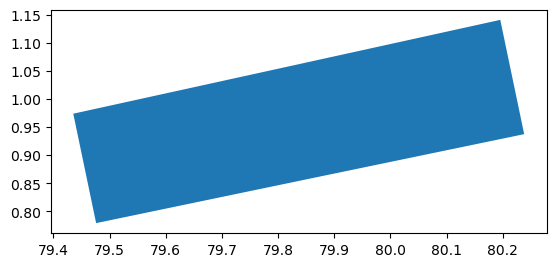

In [ ]:
geoseries.plot();

In [ ]:
cursor.execute("SELECT MAX(DISTINCT ogc_fid) FROM burst_id_map")
cursor.fetchall()

[(1127661,)]

In [ ]:
175*2148

375900

In [ ]:
375887/175

2147.925714285714

In [ ]:
1127661/3

375887.0

In [ ]:
import descarteslabs

D:\Anaconda\envs\geomatics\lib\site-packages\descarteslabs\client\__init__.py:34: FutureWarning: Python version 3.9 is not supported yet. You may encounter unexpected errors.
  warnings.warn(msg, FutureWarning)
